#### Decision Trees

A <b>Decision Tree</b> is a data-structure consisting of a hierachy of nodes. Each node is a point that either ask question or indicates a prediction.

<b>Tree Structure:</b>
Decision Trees are hierarchical in nature and have tree structure which consists:
- Root node
- Branches
- Internal nodes 
- Leaf nodes.

<b>How does the Decision Tree model works?</b>

Stage 1: Tree Building phase

From the <b>Root node</b> of a Decision Tree, the model is now learning which are the features and targets that have been assigned to it. At this stage the tree will ask a binary question(Yes or No) when we split the root node into internal nodes. Nodes can split into subsequent nodes with the help of <b>branches</b>. The algorithm, calculates an Entropy value. The Entropy value (uncertainty/unpredictability component) is usually high since,at this point the model holds a mixture of classes/target variable and need to be further split to be able to classify those classes. The root node is known to be impure.

Stage 2: Learning Phase

As the tree is being split into subsequent nodes called <b>Internal nodes</b>, the model is now learning the relationship between the features and the target variable and can lower its uncertainty. The model is said to be decreasing its entropy value (uncertainty) and increasing the information gain from each node in the tree. Information Gain is simply the measure of the decrease in uncertainty/Entropy in each node. The nodes that have been confirmed as 100% classified, will be automatically considered as the leaf node and will no longer be split. The model will recursively continue splitting the other internal nodes that haven't been fully classified.


Stage 3: Decision/Prediction Phase

At this stage, after the tree has been split to its maximum depth, the entropy is expected to be at its lowest or equal to 0, therefore increasing the purity of each nodes. These new nodes are then called <b>Leaf nodes</b>. The leaf nodes are the points that generate predictions and cannot be split further.


<p align="center">
<img src="https://i.imgur.com/eTIp06W.png" width="550" height="300" />
</p>


<b>How to choose the splitting attribute?</b>

1. Gini Impurity: 

<b>Gini Impurity/Index</b> is a method for splitting the nodes when the target variable is categorical.Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. The lower the Gini Impurity, the higher is the homogeneity of the node. 
#insert gini formula

Note:
- The Gini Impurity of a pure node =  zero(1 class).
- The Gini Impurity of an impure node = 1(for many classes).
- The Gini Impurity= 0.5, equally distributed elements of classes.

2. Information Gain

Formula for Information Gain = 1- Entropy


<b>Why do we prune a Decision Tree ?</b>

Pruning a decision tree means removing some of the leaves by cutting the branches, and then replacing the split with a leaf that is the average of a larger number of observations.

The motivation behind pruning is to prevent model overfitting on the training dataset, we will adjust the parameters of the models to prune the Decision Tree. 

<b> Types of pruning </b>
1. <b> Pre-pruning </b> is a technique similar to early stopping, and involves parameter setting such as max depth, min sample leafs.
2. <b> Post-pruning </b> is a technique used after the dataset has been trained. This involves incorporating a concept called <b> Cost Complexity Pruning. </b> 

#### Drug Classification Problem Statement 

The goal of the analysis to apply decision tree technique to a drug classfication dataset to predict the outcome of the drugs that might be suitable for the patient.

The analysis takes into consideration a patient's Age,Sex,Blood Pressure Levels (BP),Cholesterol Levels and Na to Potassium Ratio as input variables and predict which drug set(A,B,C,X,Y) which is the target variable should be assigned to them. 

#### Data Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from yellowbrick.model_selection import LearningCurve
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
drug_df = pd.read_csv('/users/kunalramchurn/Desktop/all scripts/data/drug200.csv')
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
drug_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.32,16.54,15.00,31.00,45.00,58.00,74.00
Na_to_K,200.0,16.08,7.22,6.27,10.45,13.94,19.38,38.25


In [6]:
drug_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### Exploratory Data Analysis

The patient's age group under study is between 15 to 74 years old, with the average patient's age being 44 years old.

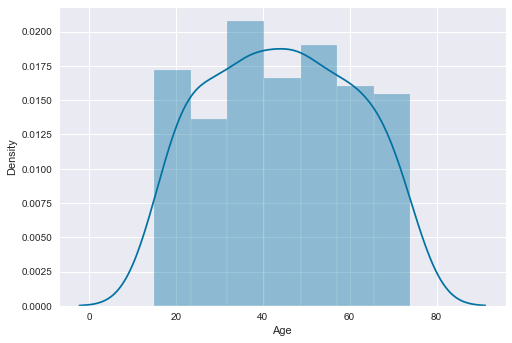

In [71]:
sns.distplot(drug_df['Age']);

Drug Y,A,B is mostly prescibed for patients with high Blood pressure levels. Drug Y seems to be popular regardless of the BP levels.

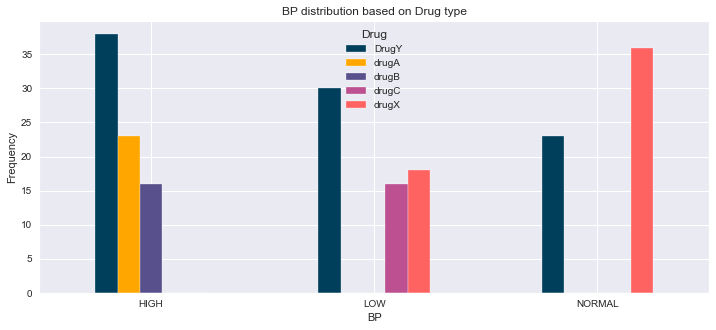

In [68]:
pd.crosstab(drug_df.BP,drug_df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('BP distribution based on Drug type')
plt.xlabel('BP')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Women are more likely to be prescibed Drug Y more than men.

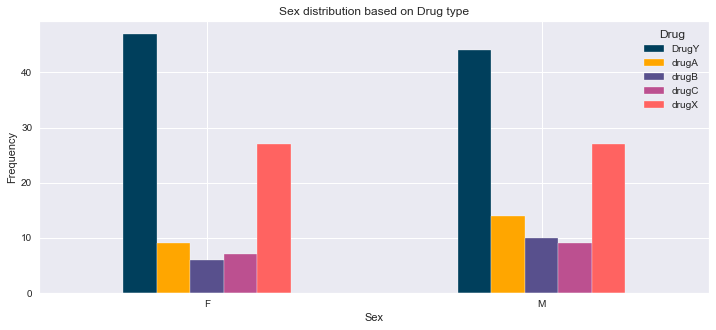

In [69]:
pd.crosstab(drug_df.Sex,drug_df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Sex distribution based on Drug type')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

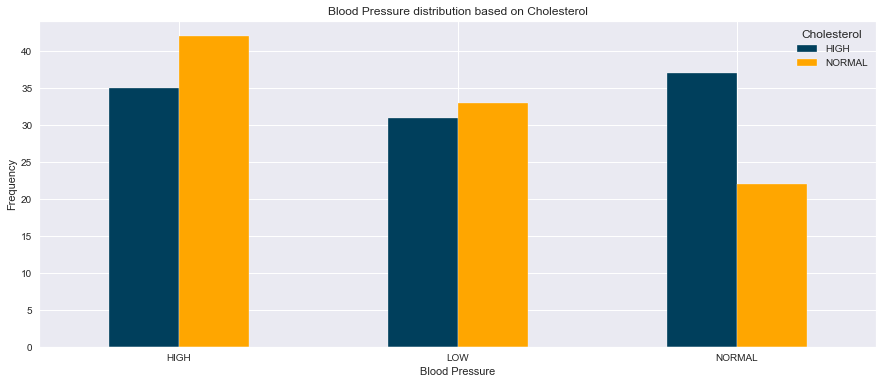

In [8]:
pd.crosstab(drug_df.BP,drug_df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#003f5c','#ffa600'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [6]:
#represent na to k to age

#### Feature Engineering

In [3]:
le= LabelEncoder()
drug_df['BP_encoded']=le.fit_transform(drug_df.BP)
drug_df['Cholesterol_encoded']=le.fit_transform(drug_df.Cholesterol)
drug_df['Sex_encoded']=le.fit_transform(drug_df.Sex)
drug_df['Drug_en']=le.fit_transform(drug_df.Drug)

In [4]:
X= drug_df[['Age', 'Na_to_K','BP_encoded', 'Cholesterol_encoded', 'Sex_encoded']]
y=drug_df['Drug_en']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#### Hyperparameter Tuning

In [6]:
#definte param grid
param_grid = {'max_leaf_nodes': list(range(2, 50)), 
              'min_samples_split': [2, 3, 4],
              'max_depth':[2,3,4,5],
              'min_samples_leaf':[2,3,4,5,6,7]}
grid_search_cv= GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=param_grid,verbose=1,cv=3)
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [7]:
print(grid_search_cv.best_estimator_)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, min_samples_leaf=2,
                       random_state=42)


#### Model Deployment

$Entropy= -\sum_{i=1}^cp_{i}\log_2(p_{i})$

p: probability that samples that belongs to class c for a particular node.
Entropy makes a log computation which increases computational power.

As a pre-pruning technique, we will set the max_depth parameter to 4 and minimum # of samples per node to be 2. 

In [8]:
clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=2,criterion='entropy',random_state=42)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print('accuracy score on training set: {:.2f}%'.format(clf.score(X_train,y_train)*100))
print('accuracy score on testing set: {:.2f}%'.format(clf.score(X_test,y_test)*100))

accuracy score on training set: 100.00%
accuracy score on testing set: 96.67%


We can see that the model overfits a little with the training set accuracy to be 100 %.

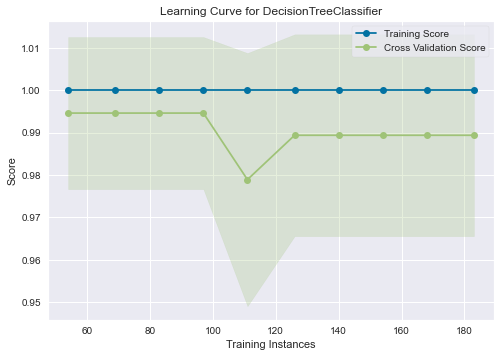

In [10]:
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    clf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        
visualizer.show();           

In [11]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

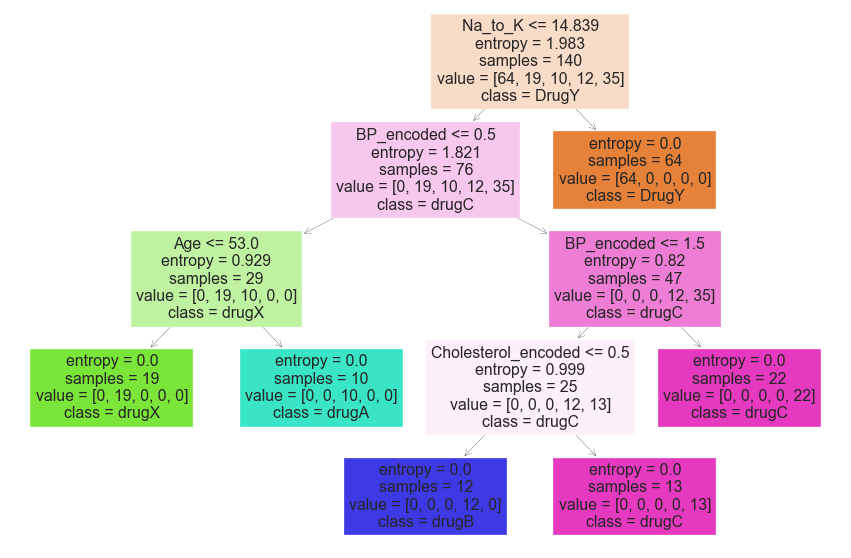

In [37]:
class_names=['DrugY','drugX','drugA','drugB','drugC']
plt.figure(figsize=[15,10])
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=class_names,
               filled = True);

#### Post Pruning Model Deployment

We will implement the Post-pruning approach in order to reduce the overfitting experienced in the model above. 

Cost complexity Pruning(CCP)

Cost complexity pruning provides another option to control the size of a tree. In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.

Steps:
1. Calculate the Sum of Squared residuals(SSR) for each tree
2. Calculate tree score for each tree


Tree Score= SSR for tree/Subtree+ Tree complexity penalty that is the function of the number of leaves or Terminal nodes in the tree/subtree

The tree complexity penalty compensates for the difference in the number of leaves.

Tree Score= SSR + alpha * T

T = number of leaf nodes

if SSR=450 alpha=1000, and T=2, then treescore= 450 + 1000 * 2

if SSR=450 alpha=1000, and T=3, then treescore= 450 + 1000 * 3

Therefore, The more leaves, the larger the penalty.

Then, we pick the lowest sub-tree because of its lowest tree score.


In [38]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.9946937953613058


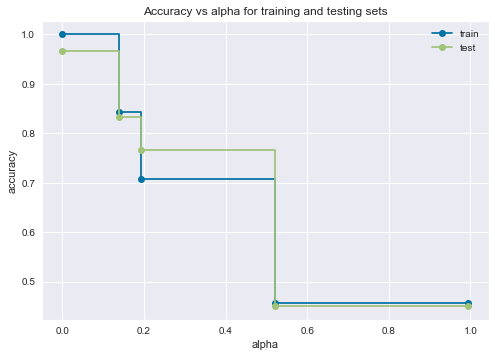

In [39]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [14]:
#postpruning 
clf_pruned = DecisionTreeClassifier(max_depth=4, ccp_alpha=0.14)
clf_pruned.fit(X_train,y_train)
pred=clf_pruned.predict(X_test)
print('accuracy score on training set: {:.2f}%'.format(clf_pruned.score(X_train,y_train)*100))
print('accuracy score on testing set: {:.2f}%'.format(accuracy_score(y_test,pred)*100))


accuracy score on training set: 84.29%
accuracy score on testing set: 83.33%


#### Model Evaluation

In [15]:
y_pred = clf_pruned.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 10


In [16]:
print('Multiclass Confusion matrix:\n {}'.format(confusion_matrix(pred,y_test)));
print('\nClassification Report:\n {}'.format(classification_report(pred,y_test)));

Multiclass Confusion matrix:
 [[27  0  0  0  0]
 [ 0  4  6  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  4 19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.40      0.57        10
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.83      0.90        23

    accuracy                           0.83        60
   macro avg       0.60      0.45      0.50        60
weighted avg       1.00      0.83      0.89        60



The <b>Receiver Operating Characteristic curve (ROC) curve</b> is created by plotting the True Positive Rate(TPR) against the False Positive Rate(FPR) at various thresholds. The ROC tells us how well our model can distinguish between the classes. The True Positive Rate (sensitivity) is the Probability of correct detection while the False Positve Rate is the probability of incorrect detection.

In [35]:
#change the name of the encoders to the drug names
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'Drug Y', 
                                        1: 'Drug X', 
                                        2: 'Drug A',
                                        3: 'Drug B',
                                        4: 'Drug C',
                                        })
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

ROC Curve for multi-class decision trees

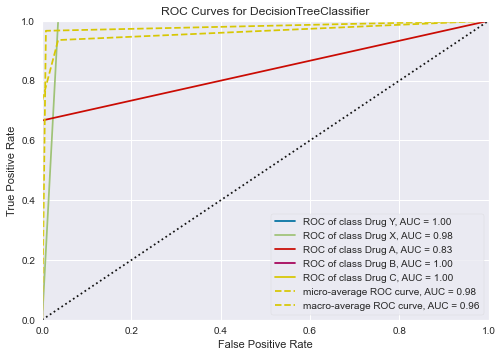

In [36]:
plot_ROC_curve(clf,X_train,y_train,X_test,y_test);

References: 

https://www.ibm.com/topics/decision-trees

https://www.kaggle.com/datasets/prathamtripathi/drug-classification

https://www.kaggle.com/code/caesarmario/85-drug-classification-w-various-ml-models


Data Source:

Kaggle: https://www.kaggle.com/datasets/prathamtripathi/drug-classification